# 1

In [2]:

class MyMatrix:
    def __init__(self, data: list[list] = None, num_rows = None, num_cols = None):
        
        if not data:
            assert(num_rows is not None and num_cols is not None)
            self.num_rows = num_rows
            self.num_cols = num_cols
            self.data = [[0 for _ in range(0, self.num_cols)] for _ in range(0, self.num_rows)]
            return 
        
        self.num_rows = len(data)
        assert(self.num_rows > 0)
        self.num_cols = len(data[0])
        assert(all([len(row) == self.num_cols for row in data]))
        self.data = [[0 for _ in range(0, self.num_cols)] for _ in range(0, self.num_rows)]
        for i in range(0, self.num_rows):
            for j in range(0, self.num_cols):
                self.data[i][j] = data[i][j]
                
    def __repr__(self):
        return '\n'.join(', '.join(f"{item:4d}" for item in row) for row in self.data)

    def __getitem__(self, index):
        row_i, col_j = index
        return self.data[row_i][col_j]
    
    def __setitem__(self, index, value):
        row_i, col_j = index
        self.data[row_i][col_j] = value


In [3]:
def mat_add(A: MyMatrix, B: MyMatrix):
    assert(A.num_rows == B.num_rows and A.num_cols == B.num_cols)
    C = MyMatrix(num_rows=A.num_rows, num_cols=A.num_cols)
    
    for i in range(0, A.num_rows):
        for j in range(0, A.num_cols):
            C[i, j] = A[i, j] + B[i, j]
    
    return C

In [4]:
mat_A = MyMatrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
mat_B = MyMatrix([[-1, 0, 1, 2], [3, 4, 5, 6], [-7, -8, -9, -10]])

print(mat_add(mat_A, mat_B))

   0,    2,    4,    6
   8,   10,   12,   14
   2,    2,    2,    2


# 2

In [5]:
def dot_row_col(A: MyMatrix, B: MyMatrix, row_i, col_j):
    sum = 0
    for i in range(A.num_cols):
        sum += A[row_i, i] * B[i, col_j]
    return sum

def mat_mul(A: MyMatrix, B: MyMatrix):
    C = MyMatrix(num_rows=A.num_rows, num_cols=B.num_cols)
    
    for i in range(0, A.num_rows):
        for j in range(0, B.num_cols):
            C[i, j] = dot_row_col(A, B, i, j)
    
    return C

In [6]:
import random

N = 4
M = 3
L = 5

mat_A = MyMatrix(num_rows=N, num_cols=M)
mat_B = MyMatrix(num_rows=M, num_cols=L)

for i in range(0, N):
    for j in range(0, M):
        mat_A[i, j] = random.randint(-20, 20)
        

for i in range(0, M):
    for j in range(0, L):
        mat_B[i, j] = random.randint(-20, 20)

print("matrix A:")
print(mat_A)
print("matrix B:")
print(mat_B)

print("matrix C (result of A * B):")
print(mat_mul(mat_A, mat_B))


matrix A:
 -10,   17,    8
   3,   16,    4
  11,  -12,   20
  -2,    1,   12
matrix B:
  -2,   18,  -19,   15,  -15
 -15,   -1,  -13,  -11,    3
  -3,   -6,    2,    4,    0
matrix C (result of A * B):
-259, -245,  -15, -305,  201
-258,   14, -257, -115,    3
  98,   90,  -13,  377, -201
 -47, -109,   49,    7,   33


In [7]:
import numpy as np

mat_A_np = np.array(mat_A.data, dtype=int)
mat_B_np = np.array(mat_B.data, dtype=int)

print(mat_A_np)
print(mat_B_np)
print(np.matmul(mat_A_np, mat_B_np))

[[-10  17   8]
 [  3  16   4]
 [ 11 -12  20]
 [ -2   1  12]]
[[ -2  18 -19  15 -15]
 [-15  -1 -13 -11   3]
 [ -3  -6   2   4   0]]
[[-259 -245  -15 -305  201]
 [-258   14 -257 -115    3]
 [  98   90  -13  377 -201]
 [ -47 -109   49    7   33]]


In [27]:
import numpy as np
import time
import matplotlib.pyplot as plt

def create_square_mats(N: int):
    mat_A = MyMatrix(num_rows=N, num_cols=N)
    mat_B = MyMatrix(num_rows=N, num_cols=N)

    for i in range(0, N):
        for j in range(0, N):
            mat_A[i, j] = random.randint(-20, 20)
            

    for i in range(0, N):
        for j in range(0, N):
            mat_B[i, j] = random.randint(-20, 20)
    return mat_A, mat_B

N = 4
N_MAX = 50
NUM_RUNS = 10

duration = [[], []]

ns = np.linspace(N, N_MAX, 20)
for n in ns:
    side_len = int(n)
    mat_A, mat_B = create_square_mats(side_len)
    mat_A_np = np.array(mat_A.data, dtype=int)
    mat_B_np = np.array(mat_B.data, dtype=int)

    start_time = time.time()
    for run in range(0, NUM_RUNS):
        mat_C = mat_mul(mat_A, mat_B)
    end_time = time.time()
    duration[0].append((end_time - start_time) / NUM_RUNS)
    
    start_time = time.time()
    for run in range(0, NUM_RUNS * 100):
        mat_C_np = np.matmul(mat_A_np, mat_B_np)
    end_time = time.time()
    duration[1].append((end_time - start_time) / (NUM_RUNS * 100))
    

(1e-08, 0.5)

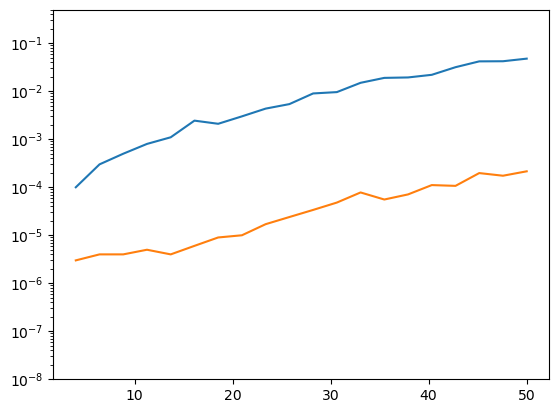

In [28]:

fig, ax = plt.subplots()
ax.plot(ns, duration[0], label="my matmul")
ax.plot(ns, duration[1], label="numpy matmul")
ax.set_yscale('log')
ax.set_ylim([1e-8, 0.5])

The numpy implementation is significantly faster than my custom (naive) implementation. It is known that numpy uses optimized algorithms and data structures, whereas my own matrix is implemented directly in Python without any optimizations.

# 3

In [104]:
# Implement SVD
import numpy as np
from numpy import linalg

def compute_svd(A: np.ndarray):
    eigval, eigvec = linalg.eig(np.matmul(A.T, A))
    
    # use abs since sometimes a negative value is returned, which should be zero but
    # is just very small and negative due to floating point error.
    mat_Sigma = np.diag(np.sqrt(np.abs(eigval)))
    mat_V = eigvec
    mat_U = np.matmul(np.matmul(A, mat_V), linalg.inv(mat_Sigma))
    return mat_U, mat_Sigma, mat_V

    
    
mat_A = np.random.rand(4, 5)
mat_U, mat_Sigma, mat_V = compute_svd(mat_A)
print(np.allclose(mat_A, np.matmul(np.matmul(mat_U, mat_Sigma), mat_V.T), rtol=1e-05, atol=1e-08))


True
